In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
(train_data,train_targets),(test_data,test_targets) = boston_housing.load_data()

In [3]:
print(train_data.ndim)
print(train_data.shape)
print(train_data.dtype)
print(train_targets)
print(train_data[0])

2
(404, 13)
float64
[ 15.2  42.3  50.   21.1  17.7  18.5  11.3  15.6  15.6  14.4  12.1  17.9
  23.1  19.9  15.7   8.8  50.   22.5  24.1  27.5  10.9  30.8  32.9  24.
  18.5  13.3  22.9  34.7  16.6  17.5  22.3  16.1  14.9  23.1  34.9  25.
  13.9  13.1  20.4  20.   15.2  24.7  22.2  16.7  12.7  15.6  18.4  21.
  30.1  15.1  18.7   9.6  31.5  24.8  19.1  22.   14.5  11.   32.   29.4
  20.3  24.4  14.6  19.5  14.1  14.3  15.6  10.5   6.3  19.3  19.3  13.4
  36.4  17.8  13.5  16.5   8.3  14.3  16.   13.4  28.6  43.5  20.2  22.
  23.   20.7  12.5  48.5  14.6  13.4  23.7  50.   21.7  39.8  38.7  22.2
  34.9  22.5  31.1  28.7  46.   41.7  21.   26.6  15.   24.4  13.3  21.2
  11.7  21.7  19.4  50.   22.8  19.7  24.7  36.2  14.2  18.9  18.3  20.6
  24.6  18.2   8.7  44.   10.4  13.2  21.2  37.   30.7  22.9  20.   19.3
  31.7  32.   23.1  18.8  10.9  50.   19.6   5.   14.4  19.8  13.8  19.6
  23.9  24.5  25.   19.9  17.2  24.6  13.5  26.6  21.4  11.9  22.6  19.6
   8.5  23.7  23.1  22.4  20.5  23.

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [5]:
from keras import models,layers

def build_model():
    model = models.Sequential()
    
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])
    return model

In [28]:
import numpy as np

k = 4
num_val_samples = len(train_data)//4
num_epochs = 500

In [30]:
all_scores = []

for i in range(k):
    print('processing fold # ',i+1)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], 
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                          train_targets[(i+1)*num_val_samples:]], 
                                           axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0, 
                       validation_data=(val_data,val_targets))
    mae_history = history.history['val_mean_absolute_error']
    all_scores.append(mae_history)
    
print("K fold validation finished")

processing fold #  1
processing fold #  2
processing fold #  3
processing fold #  4
K fold validation finished


In [45]:
avg_mae_histories = [
    np.mean([x[i] for x in all_scores]) for i in range(num_epochs)
]

Text(0,0.5,'MAE')

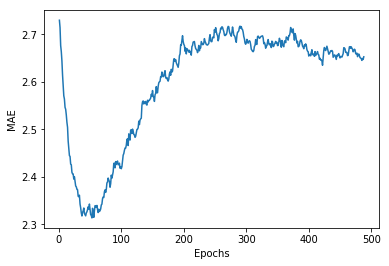

In [46]:
def smooth(points, factor=0.9):
    smp = []
    for point in points:
        if smp:
            prev = smp[-1]
            smp.append(prev*factor + point*(1-factor))
        else:
            smp.append(point)

    return smp

avg_mae_histories = smooth(avg_mae_histories[12:])

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, len(avg_mae_histories)+1), avg_mae_histories)
plt.xlabel('Epochs')
plt.ylabel('MAE')

In [38]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
model.evaluate(test_data,test_targets)

102/102 [==============================] - 0s 2ms/step


[16.492712731454887, 2.5588560758852492]